In [51]:
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumRegister
from qiskit import ClassicalRegister

from qiskit.visualization import plot_histogram, plot_state_city

from qiskit_aer import AerSimulator

import numpy as np

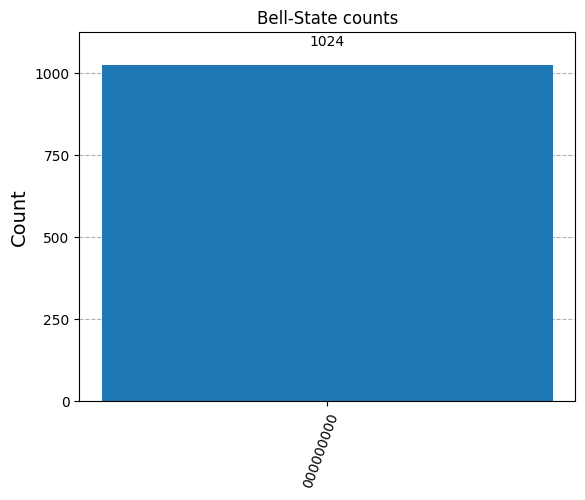

In [56]:
# Create a new circuit with two qubits
circuit = QuantumCircuit(9)
  
# CNOT
circuit.cx(0, 3);       circuit.cx(0, 6)

# HADAMARD
circuit.h(0);           circuit.h(3);           circuit.h(6)

# CNOT
circuit.cx(0, 1);       circuit.cx(3, 4);       circuit.cx(6, 7)
circuit.cx(0, 2);       circuit.cx(3, 5);       circuit.cx(6, 8)

circuit.barrier() ###############################################

#Bit flip error
circuit.x(0)

#Phase flip error
circuit.z(0)

circuit.barrier() ###############################################

# CNOT
circuit.cx(0, 1);       circuit.cx(3, 4);       circuit.cx(6, 7)
circuit.cx(0, 2);       circuit.cx(3, 5);       circuit.cx(6, 8)

# TOFFOLI
circuit.ccx(2, 1, 0);   circuit.ccx(5, 4, 3);   circuit.ccx(8, 7, 6)

# HADAMARD
circuit.h(0);           circuit.h(3);           circuit.h(6)

# CNOT
circuit.cx(0, 3);       circuit.cx(0, 6)

# TOFFOLI
circuit.ccx(6, 3, 0); 

circuit.barrier() ###############################################

circuit.measure_all()

# Draw the circuit
circuit.draw("mpl", filename='shor_protocol.png')

# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

# Run and get counts
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Bell-State counts')